<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
housing_data = pd.read_csv('/content/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


UNDERSTANDING OUR DATA

In [39]:
# shape of or data
print("Rows and columns", housing_data.shape)

Rows and columns (545, 13)


In [40]:
# identifying information about the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [41]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [43]:
# show statistical summary of our data
housing_data.describe(include= 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [44]:
# checking null values
housing_data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


PERFORMING THE EDA

<function matplotlib.pyplot.show(close=None, block=None)>

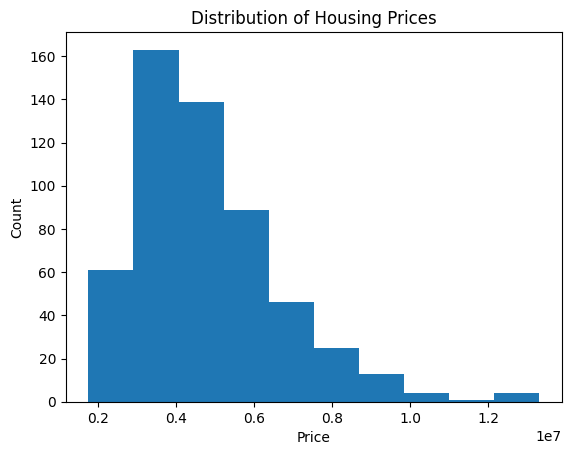

In [45]:
# histogram of price
plt.hist(housing_data['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Housing Prices')
plt.show

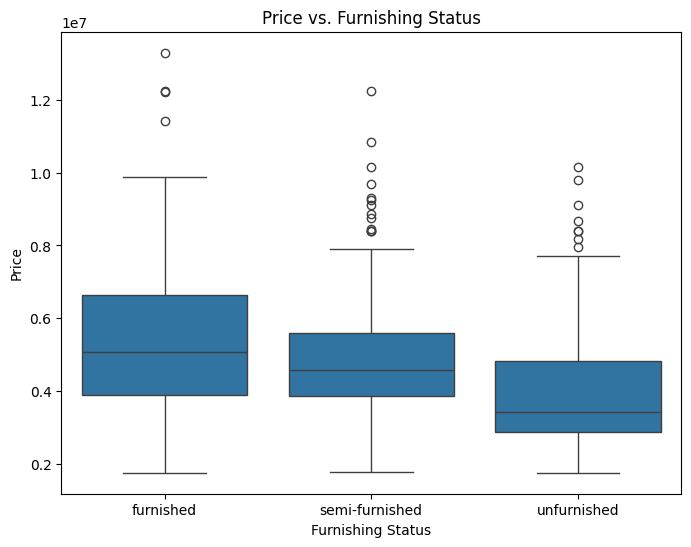

In [46]:
# boxplot of price vs furnishing status
plt.figure(figsize=(8, 6))
sns.boxplot(x='furnishingstatus', y='price', data=housing_data)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Price vs. Furnishing Status')
plt.show()

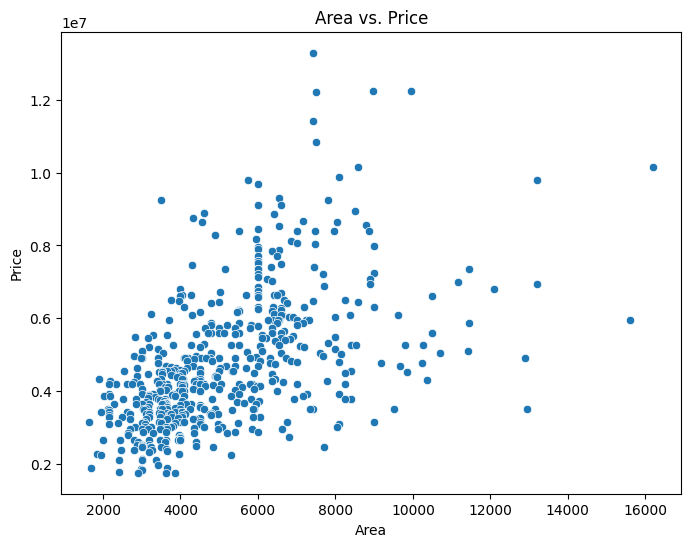

In [47]:
# scatter plot for area vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=housing_data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()


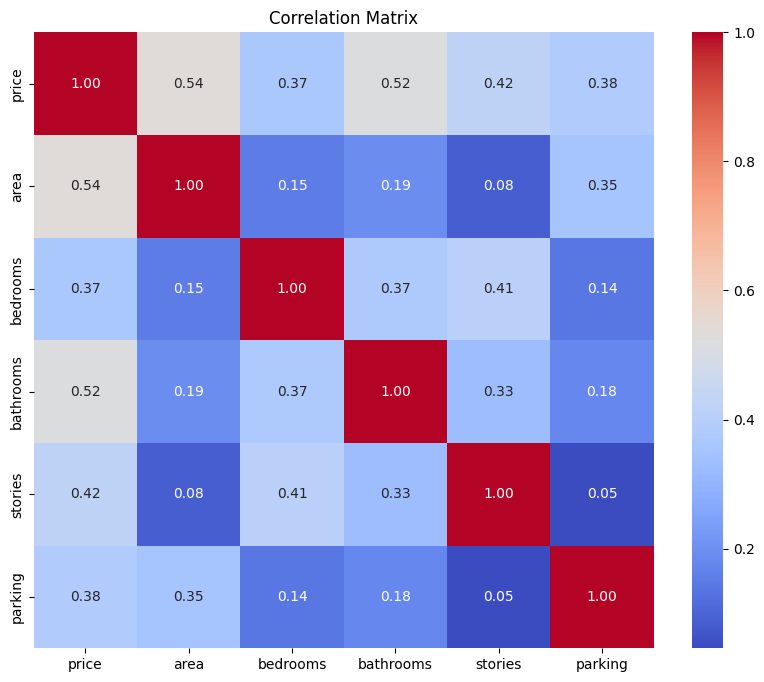

In [53]:
# heatmap for correlational matrix
# Select only numeric columns for correlation calculation
numeric_data = housing_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


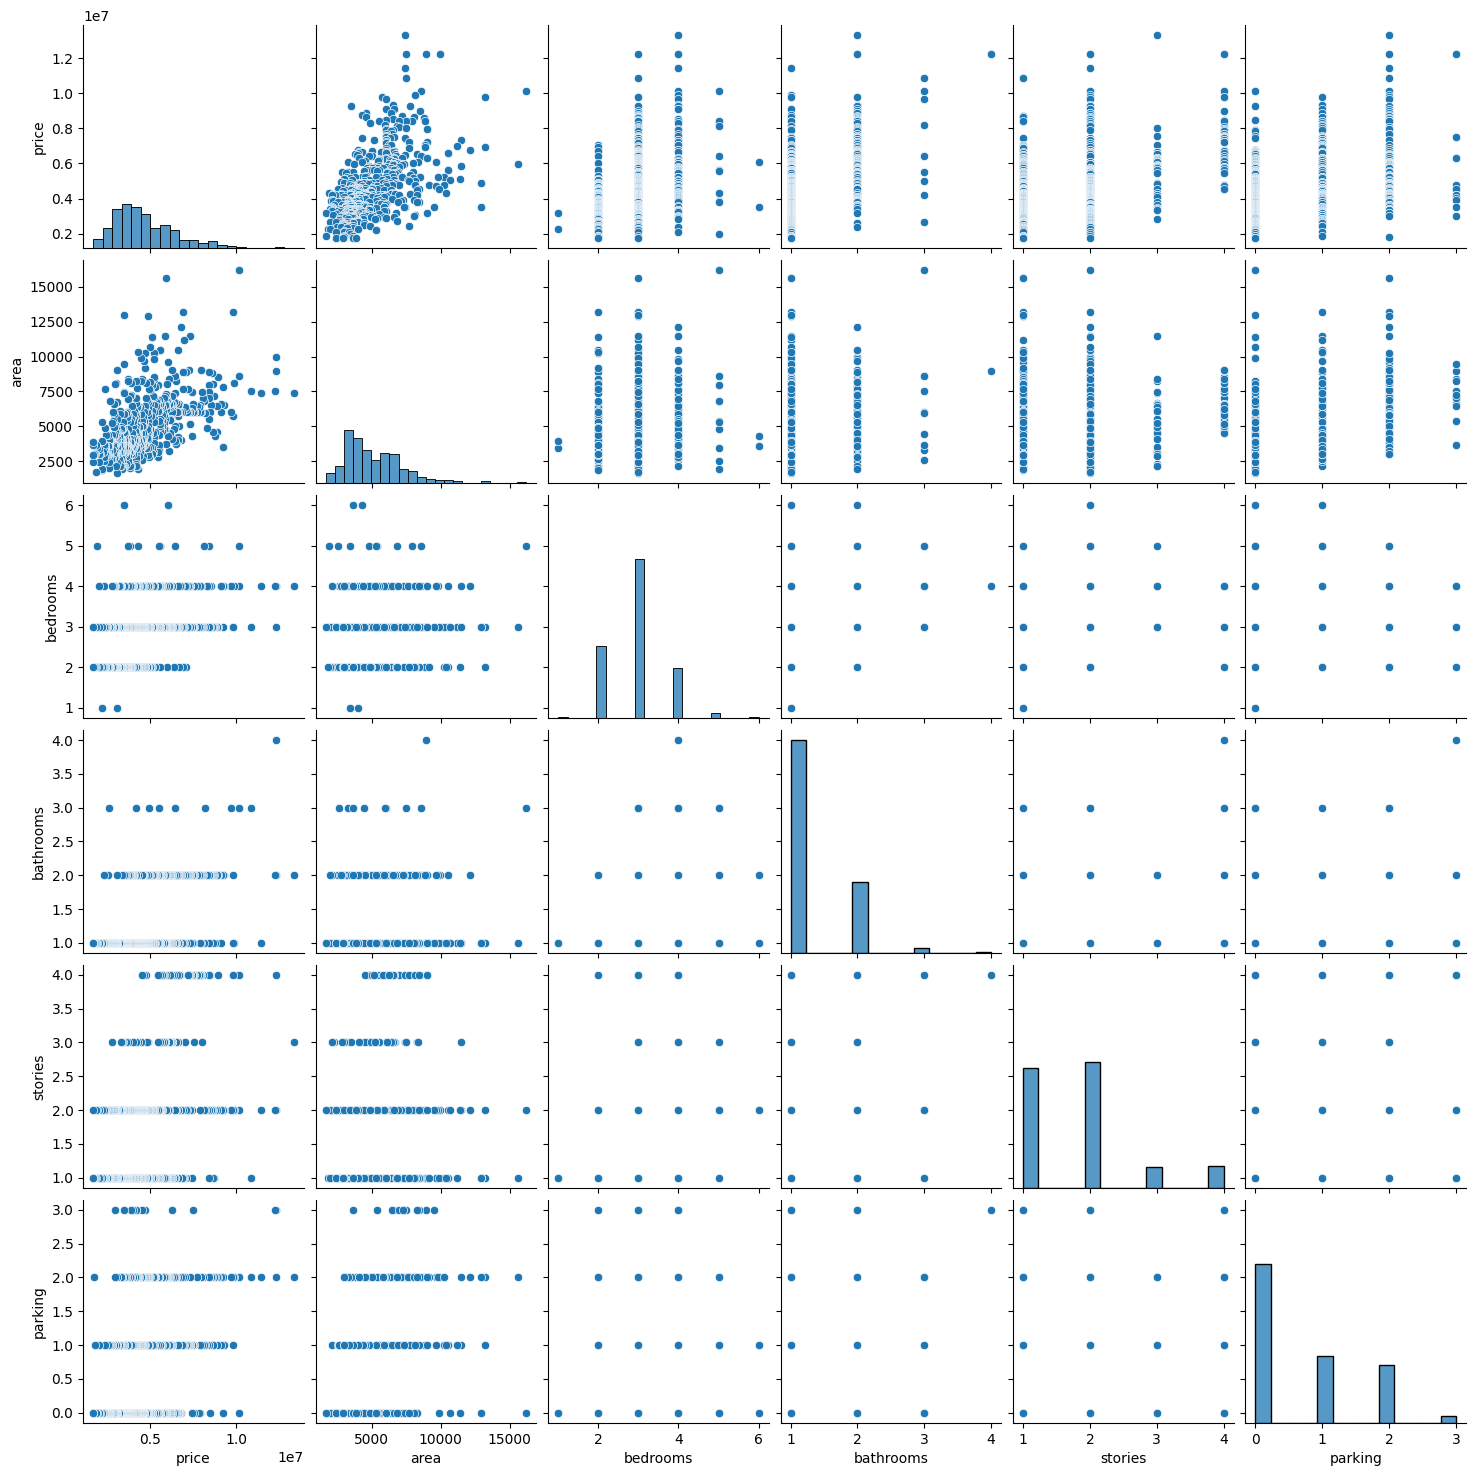

In [54]:
sns.pairplot(housing_data)
plt.show()

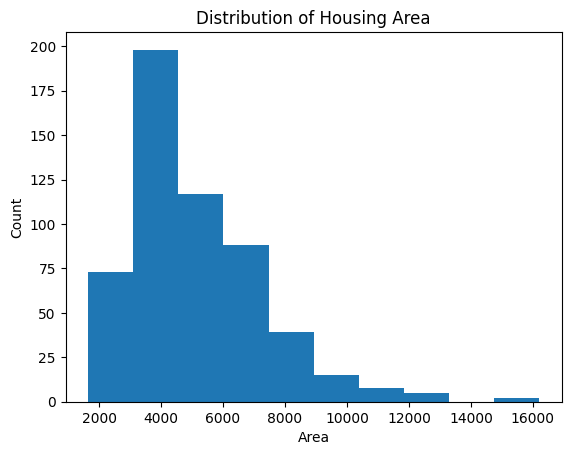

In [55]:
# hstogram for area
plt.hist(housing_data['area'])
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Housing Area')
plt.show()

DATA CLEANING AND ENCODING

Binary Categorical Variables:
Columns such as 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', and 'prefarea' contain binary categorical variables with "yes" and "no" values.
To facilitate analysis and modeling, we can consider converting these variables to numeric values, such as 1 for "yes" and 0 for "no". This conversion allows the variables to be treated as binary variables rather than string values.

HANDLING BINARY CATEGORICAL VARIABLES

In [57]:
# List of categorical columns containing 'yes' and 'no' values
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [60]:
housing_data[categorical_columns]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [61]:
# display the first 5 rows of the dataframe 'housing-data'
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


HANDLING CATEGORICAL DATA WITH DUMMY VARIABLE

In [67]:
# Generate dummy variables for the 'furnishingstatus' column
dummy_col = pd.get_dummies(housing_data['furnishingstatus'])



In [66]:
# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [70]:
# Regenerating dummy variables for the 'furnishingstatus' column, dropping the first category
dummy_col = pd.get_dummies(housing_data['furnishingstatus'], drop_first=True)

In [69]:
# Display the first few rows of the dummy variables DataFram
dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [71]:
# Concatenate the original 'data' DataFrame with the 'dummy_col' DataFrame along columns
housing_data = pd.concat([housing_data, dummy_col], axis=1)

# Display the first few rows of the updated DataFrame
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [74]:
# drop the furnishingstatus column from the dataframe
# Check if 'furnishingstatus' column exists before dropping
if 'furnishingstatus' in housing_data.columns:
    housing_data.drop('furnishingstatus', axis=1, inplace=True)

# display the first few rows of the updated dataframe
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


  SPLITTING DATA INTO TRAINING AND TESTING DATA

In [75]:
# SHOW THE COLUMNS OF THE DATASET
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [82]:
# split the data into training and testing subsets
# df_train
# df_test
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,False,False
93,6300000,7200,3,2,1,1,0,1,0,1,3,0,True,False
335,3920000,3816,2,1,1,1,0,1,0,1,2,0,False,False
412,3430000,2610,3,1,2,1,0,1,0,0,0,1,False,True
471,3010000,3750,3,1,2,1,0,0,0,0,0,0,False,True


In [80]:
# checking the shape of the training set
df_train.shape

(436, 14)

In [84]:
# display the first few rows of the testing subset
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,False,True
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,False,False
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,True,False
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,True,False
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,False,False


In [85]:
# checking the shape of the training set
df_test.shape

(109, 14)

SCALING TRAINING DATA

In [88]:
# list of columns to scale
columns_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [90]:
# Scaling the specified columns in the training subset using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

In [91]:
# displaying the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,False,False
93,0.433333,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,True,False
335,0.206667,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,False,False
412,0.160000,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,False,True
471,0.120000,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,False,True


TRAINING THE MODEL


In [92]:
# To display the first few rows of the target variable in the training subset
y_train.head()

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000


In [99]:
# Creating an instance of LinearRegression
linear_regression = LinearRegression()

In [100]:
# Fitting the Linear Regression model to the training data
linear_regression.fit(X_train, y_train)

LinearRegression()

In [101]:
# Retrieve the coefficients of the Linear Regression model
coefficients = linear_regression.coef_

# print the coefficients

print(coefficients)


[ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05 -1.83959974e+05  1.83959974e+05 -1.15805019e+05
  1.15805019e+05 -1.95125588e+05  1.95125588e+05 -3.42324943e+05
  3.42324943e+05 -3.95713368e+05  3.95713368e+05 -3.14945283e+05
  3.14945283e+05  1.80175627e+05  5.32938090e+04 -2.33469436e+05]
